In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("travel insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [3]:
df.shape

(63326, 11)

In [4]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [5]:
df = df.drop(columns=['Destination','Product Name','Net Sales','Commision (in value)'])
df.head()

,Agency,Agency Type,Distribution Channel,Claim,Duration,Gender,Age
0,CBH,Travel Agency,Offline,No,186,F,81
1,CBH,Travel Agency,Offline,No,186,F,71
2,CWT,Travel Agency,Online,No,65,NaN,32
3,CWT,Travel Agency,Online,No,60,NaN,32
4,CWT,Travel Agency,Online,No,79,NaN,41


In [6]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Claim                       0
Duration                    0
Gender                  45107
Age                         0
dtype: int64

In [7]:
df.Gender.fillna(method='bfill',inplace=True)

In [8]:
df.Gender.isnull().sum()

0

##   Agency

In [9]:
df[['Agency']].value_counts()

Agency
EPX       35119
CWT        8580
C2B        8267
JZI        6329
SSI        1056
JWT         749
RAB         725
LWC         689
TST         528
KML         392
ART         331
CCR         194
CBH         101
TTW          98
CSR          86
ADM          82
dtype: int64

In [10]:
df['Agency'].replace({'EPX':15,'CWT':14,'C2B':13,'JZI':12,'SSI':11,'JWT':10,'RAB':9,'LWC':8,'TST':7,'KML':6,'ART':5,'CCR':4,'CBH':3,'TTW':2,'CSR':1,'ADM':0},inplace=True)

In [11]:
df[['Agency']].value_counts()

Agency
15        35119
14         8580
13         8267
12         6329
11         1056
10          749
9           725
8           689
7           528
6           392
5           331
4           194
3           101
2            98
1            86
0            82
dtype: int64

## Agency Type

In [12]:
df[['Agency Type']].value_counts()

Agency Type  
Travel Agency    45869
Airlines         17457
dtype: int64

In [13]:
df['Agency Type'].replace({"Travel Agency":1,"Airlines":0},inplace=True)

In [14]:
df[['Agency Type']].value_counts()

Agency Type
1              45869
0              17457
dtype: int64

## Distribution Channel

In [15]:
df[['Distribution Channel']].isnull().sum()

Distribution Channel    0
dtype: int64

In [16]:
df[['Distribution Channel']].value_counts()

Distribution Channel
Online                  62219
Offline                  1107
dtype: int64

In [17]:
df['Distribution Channel'].replace({"Online":1,"Offline":0},inplace=True)

In [18]:
df[['Distribution Channel']].value_counts()

Distribution Channel
1                       62219
0                        1107
dtype: int64

## Claim

In [19]:
df[['Claim']].value_counts()

Claim
No       62399
Yes        927
dtype: int64

In [20]:
df['Claim'].replace({"No":0,"Yes":1},inplace=True)

In [21]:
df[['Claim']].value_counts()

Claim
0        62399
1          927
dtype: int64

## Gender

In [22]:
df[['Gender']].value_counts()

Gender
M         41261
F         22065
dtype: int64

In [23]:
df["Gender"].replace({"M":1,"F":0},inplace=True)

## Now in our dataset all the categorical values are converted into numeric data

In [24]:
df.head()

,Agency,Agency Type,Distribution Channel,Claim,Duration,Gender,Age
0,3,1,0,0,186,0,81
1,3,1,0,0,186,0,71
2,14,1,1,0,65,0,32
3,14,1,1,0,60,0,32
4,14,1,1,0,79,0,41


In [25]:
Y = df.Claim

In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [27]:
X= df.drop(columns=['Claim'])

In [28]:
X.head()

,Agency,Agency Type,Distribution Channel,Duration,Gender,Age
0,3,1,0,186,0,81
1,3,1,0,186,0,71
2,14,1,1,65,0,32
3,14,1,1,60,0,32
4,14,1,1,79,0,41


## Splitting the dataset into 80:20 ratio

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=19)

In [31]:
print("x_train.shape :- ",x_train.shape)
print("y_train.shape :- ",y_train.shape)

x_train.shape :-  (50660, 6)
y_train.shape :-  (50660,)


In [32]:
print("x_test.shape :- ",x_test.shape)
print("y_test.shape :- ",y_test.shape)

x_test.shape :-  (12666, 6)
y_test.shape :-  (12666,)


## Import logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
print("y_test\ty_pred")
for actual , predicted in zip(y_test[24:28] , y_pred[24:28]):
    print(actual,'\t',predicted)

y_test	y_pred
0 	 0
0 	 0
1 	 0
0 	 0


### Accuracy of this model

In [37]:
model.score(x_test , y_test)

0.9851571135322912

## Let's check other parameters as well

In [38]:
model.classes_

array([0, 1], dtype=int64)

In [39]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
model.predict_proba(x_test)

array([[0.99135193, 0.00864807],
       [0.99104931, 0.00895069],
       [0.99329235, 0.00670765],
       ...,
       [0.99212163, 0.00787837],
       [0.99276531, 0.00723469],
       [0.99133704, 0.00866296]])

In [41]:
#model.predict_proba(x_test[index_start : index_end])
model.predict_proba(x_test[24:28])

array([[0.99298015, 0.00701985],
       [0.99251505, 0.00748495],
       [0.94311313, 0.05688687],
       [0.99288886, 0.00711114]])

### If you want to understand more about this predict_proba parameter please read this blog: -   https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/3

# 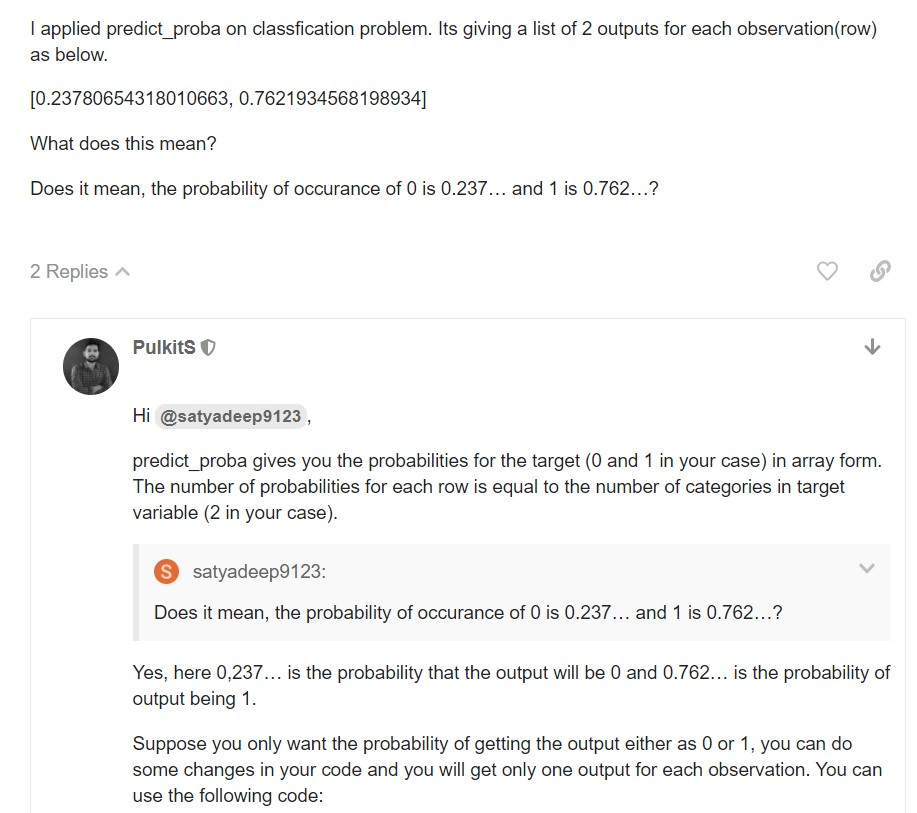

# 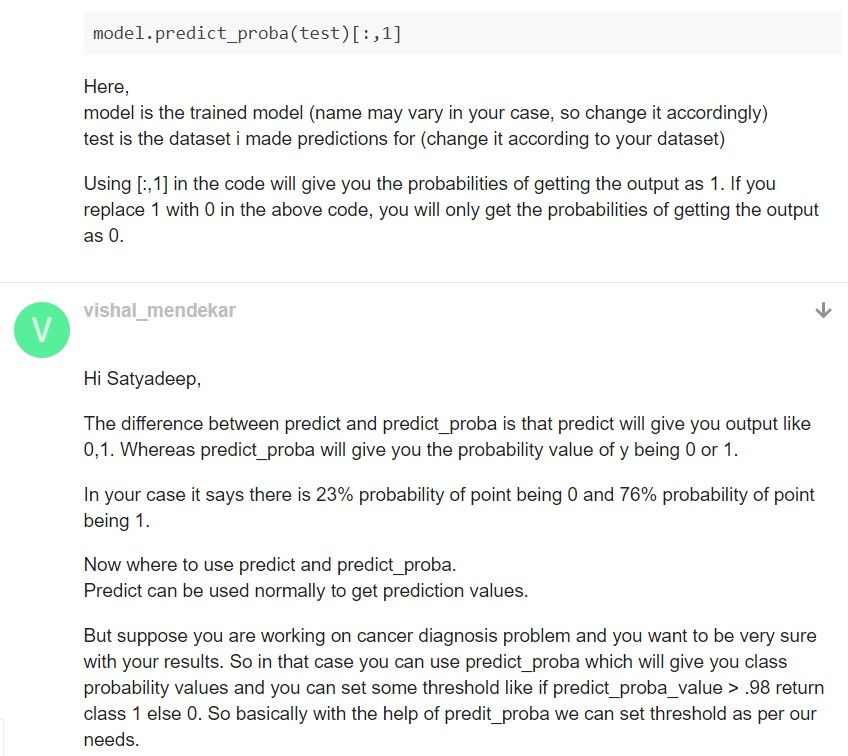